# 콘볼루션

- 합성곱을 이용한 알고리즘
- $n \times m$ 행렬에 padding 없이 $p \times p$의 필터로 stride가 $1$인 합성곱을 수행하면 결과는 $(n-p+1) \times (m-p+1)$의 행렬
- 결과 행렬의 $i$행 $j$열 성분은 아래 식과 같다.
$$\sum _{l=0}^{p-1}\sum _{k=0}^{p-1} d_{lk}f_{(l+1)(k+1)} \quad (d_{ij}는\,원본의\,i행\,j열,\, f_{ij}는\,필터의\,i행\,j열)$$
- 콘볼루션의 활성화 함수로는 ReLU를 많이 사용한다. ReLU의 식은 다음과 같다.
$$f(x)=\begin{cases}0 \quad (x<0)\\ x \quad (x \ge 0)\end{cases}$$

### ReLU

In [1]:
def relu(x):
    if x<0:
        return 0
    else:
        return x

___
### Convolution with valid padding

In [2]:
import numpy as np

def ValidConv(org,fil):
    resArray=np.zeros((org.shape[0]-fil.shape[0]+1)*(org.shape[1]-fil.shape[1]+1)).reshape(org.shape[0]-fil.shape[0]+1,org.shape[1]-fil.shape[1]+1)
    for k in range(org.shape[0]-fil.shape[0]+1):
        for l in range(org.shape[1]-fil.shape[1]+1):
            res=0
            for y_in in range(fil.shape[0]):
                for x_in in range(fil.shape[1]):
                    res+=org[k+y_in][l+x_in]*fil[y_in][x_in]
                    resArray[k][l]=relu(res)
    return resArray

### Test

In [3]:
orig=np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7],[4,5,6,7,8]])
filt=np.array([[1,0,1],[1,1,0],[0,1,0]])

원본: 4 $\times$ 5     
필터: 3 $\times$ 3   
결과: 2 $\times$ 3

In [4]:
ValidConv(orig,filt)

array([[13., 18., 23.],
       [18., 23., 28.]])

___
## Convolution with same padding

### Padding 생성
- 입력 행렬 상하좌우로 0 추가

In [5]:
pad=np.zeros((orig.shape[0]+filt.shape[0]-1)*(orig.shape[1]+filt.shape[1]-1)).reshape(orig.shape[0]+filt.shape[0]-1,orig.shape[1]+filt.shape[1]-1)

for i in range(orig.shape[0]):
    for j in range(orig.shape[1]):
        pad[1+i][1+j]=orig[i][j]

pad

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4., 5., 0.],
       [0., 2., 3., 4., 5., 6., 0.],
       [0., 3., 4., 5., 6., 7., 0.],
       [0., 4., 5., 6., 7., 8., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

### Convolution

In [6]:
def Conv(org,fil):
    pad=np.zeros((org.shape[0]+fil.shape[0]-1)*(org.shape[1]+fil.shape[1]-1)).reshape(org.shape[0]+fil.shape[0]-1,org.shape[1]+fil.shape[1]-1)

    for i in range(org.shape[0]):
        for j in range(org.shape[1]):
            pad[int(((fil.shape[0]-1)/2)+i)][int(((fil.shape[1]-1)/2)+j)]=org[i][j]

    resArray=np.zeros((org.shape[0])*(org.shape[1])).reshape(org.shape[0],org.shape[1])
    for k in range(org.shape[0]):
        for l in range(org.shape[1]):
            res=0
            for y_in in range(fil.shape[0]):
                for x_in in range(fil.shape[1]):
                    res+=pad[k+y_in][l+x_in]*fil[y_in][x_in]
                    resArray[k][l]=relu(res)
    return resArray

### Test

In [7]:
Conv(orig,filt)

array([[ 3.,  6.,  9., 12., 15.],
       [ 7., 13., 18., 23., 22.],
       [10., 18., 23., 28., 26.],
       [ 8., 17., 21., 25., 21.]])

___
## 실제 이미지로 테스트
- MNIST 패션 데이터

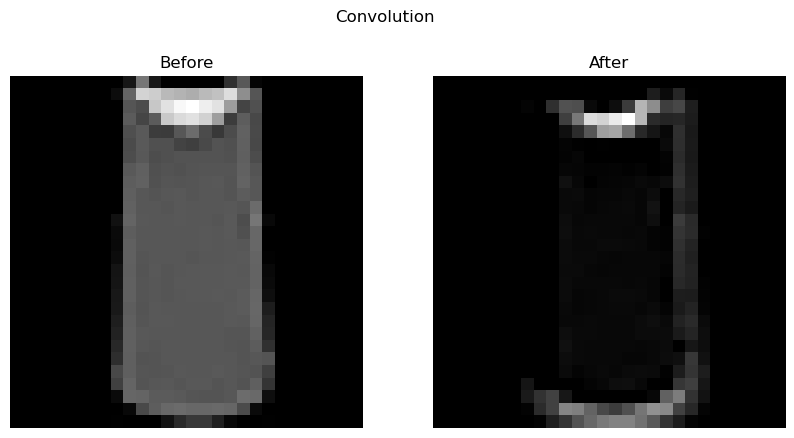

In [8]:
import matplotlib.pyplot as plt
from tensorflow import keras

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

f1=np.array([[35,15,40.7],[0,59,0],[0,-55,-85]])

ax1.imshow(train_input[2],cmap='gray')
ax1.set_title('Before')
ax1.set_axis_off()
ax2.imshow(Conv(train_input[2],f1),cmap='gray')
ax2.set_title('After')
ax2.set_axis_off()
plt.suptitle('Convolution')
plt.show()

In [9]:
train_target[2]

0